#CS5330 Spring 2024 Lab 1 Sky Detection
##author: Yanxin(Cass) Zhong
##NUID: 002921640

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

###Image Reading

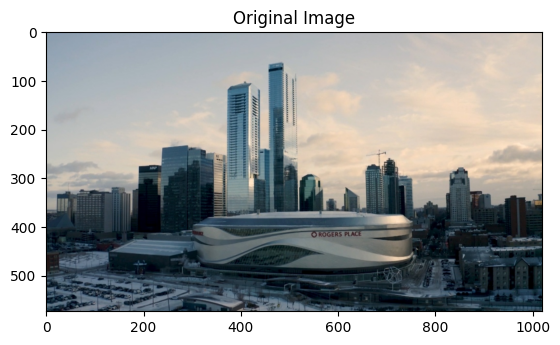

In [86]:
img = cv2.imread("/content/1_6153158.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Original Image")
plt.imshow(img_rgb)

###Convert Image to grayscale

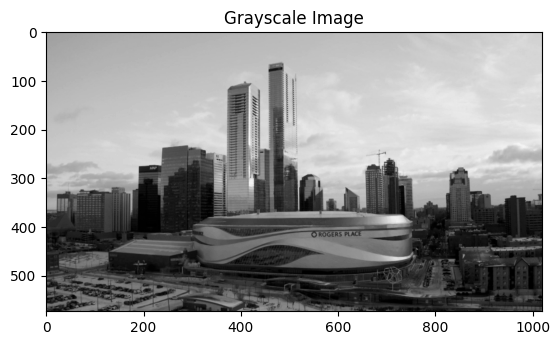

In [87]:
# convert to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.title("Grayscale Image")
plt.imshow(img_gray, cmap='gray')

###Image Blurring

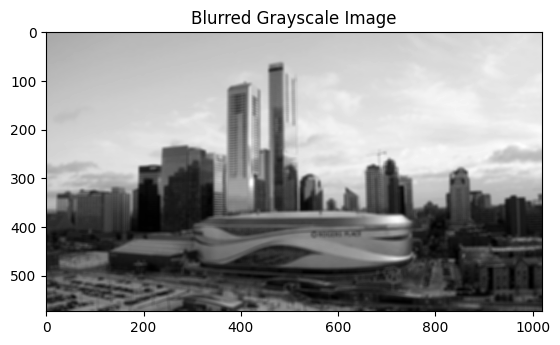

In [88]:
# blur the image to reduce unnecessary details
img_blur = cv2.blur(img_gray,ksize=(7, 7))
plt.figure()
plt.title("Blurred Grayscale Image")
plt.imshow(img_blur, cmap='gray')

###Edge Detection

In [89]:
# find edges with both thresholds equal to 127
edges = cv2.Canny(img_gray, threshold1=127,threshold2=127)

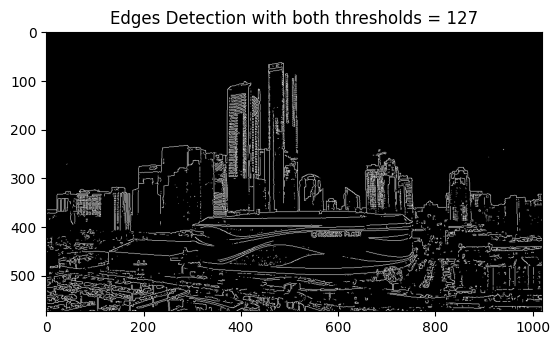

In [90]:
plt.figure()
plt.title("Edges Detection with both thresholds = 127")
plt.imshow(edges, cmap='gray')

In [91]:
# set the median value for pixels
median_pixel = np.median(img_gray)
median_pixel

161.0

In [92]:
# set upper and lower threshold for better edge detection
lower = int(max(0, 0.7 * median_pixel))
upper = int(min(255, 1.3 * median_pixel))

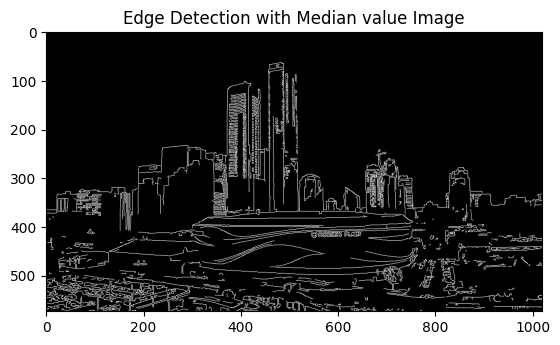

In [93]:
edges_by_median = cv2.Canny(image=img_gray, threshold1=lower, threshold2=upper)
plt.figure()
plt.title("Edge Detection with Median value Image")
plt.imshow(edges_by_median, cmap='gray')

###Ostu's Thresholding

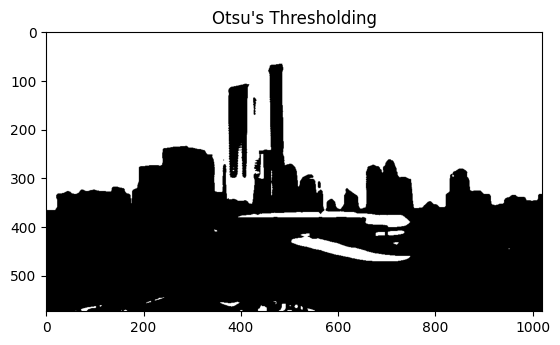

In [94]:
# use Ostu's thresholding to verify sky portion
ret,th = cv2.threshold(img_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure()
plt.title("Otsu's Thresholding")
plt.imshow(th, cmap='gray')

###Put a Combined Mask on the Image to Detect the Sky

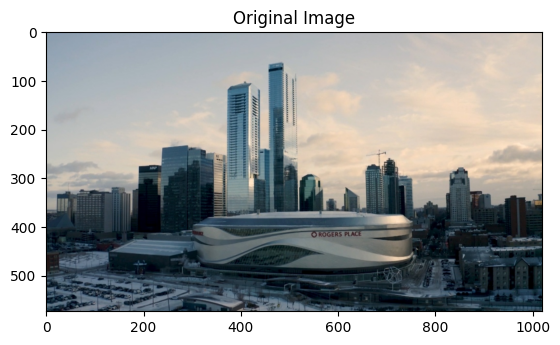

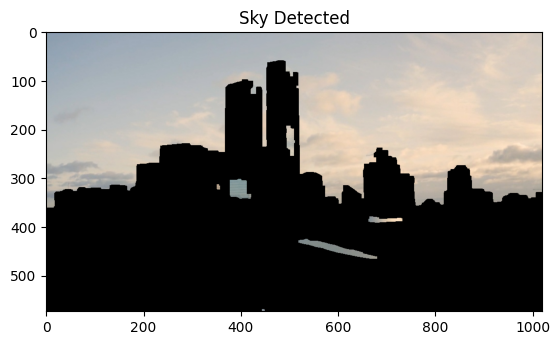

In [95]:
# combine the inverse of otsu thresholding and the edges to mask to the image
otsu_inverse = cv2.bitwise_not(th)
combined_mask = cv2.bitwise_or(edges_by_median, otsu_inverse)

# use dilation and closing to refine edges
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(combined_mask,kernel,iterations = 2)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)

masked_image = img_rgb.copy()
masked_image[closing == 255] = [0, 0, 0]

plt.figure()
plt.title("Original Image")
plt.imshow(img_rgb)


plt.figure()
plt.title("Sky Detected")
plt.imshow(masked_image)


